<a href="https://colab.research.google.com/github/CHRISJUMA-9/Tensor-Flow-Fundamentals/blob/main/01_Neural_Network_Regression_With_Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

Regression is beasically predicting a numerical variable based on some other combination of variables or simply predicting a number

from types import ModuleType
# Outline
Architecture of a Neural regression model

Input shapes and output shapes of a regression model (features and labels)

Creating custom data to view and fit

Steps in modelling

Creating a model, compilling a model, evaluating a model

Different evaluation methods

Saving and loading models

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating some data to view and fit

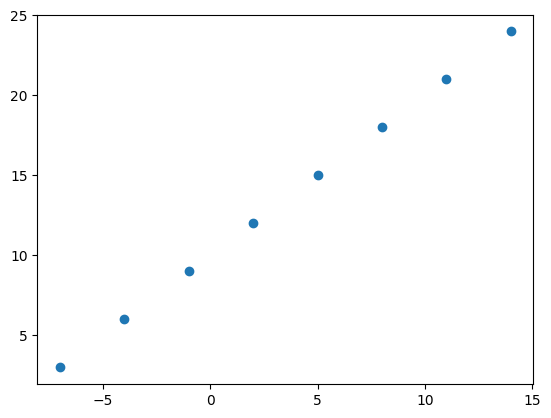

In [3]:
import  numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [5]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [6]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [7]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [9]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [10]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [11]:
# What if we check the shape of X and Y
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [12]:
X[0].ndim # Scalar are ranked zero tensors since they have zero dimensions

0

In [13]:
X[0], y[0] # we are using 1 X value to predict 1 Y value

(np.float64(-7.0), np.float64(3.0))

In [14]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Now checking the input and output shapes when X, and Y are tensors
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

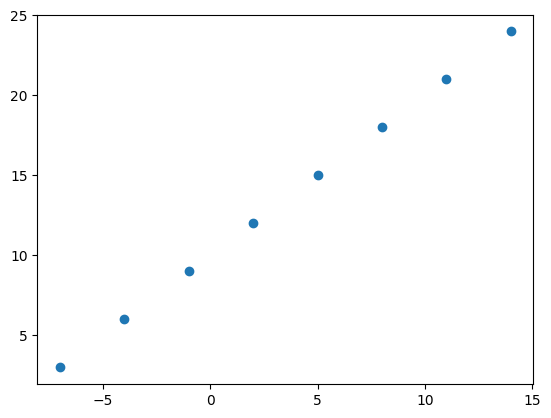

In [16]:
plt.scatter(X, y); # Building a modell that figures the relationsip between input and output values

## Steps in Modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [17]:
# This is our Machine Learning Model...
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model (defines how module will learn from the data)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (Looking at the input x, y an trying to figure out patterns)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) #epochs means run through the data a certain number of times


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step - loss: 11.2421 - mae: 11.2421
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 11.1096 - mae: 11.1096
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.9771 - mae: 10.9771
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.8446 - mae: 10.8446
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.7121 - mae: 10.7121


In [18]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Try and make our prediction using our model
y_pred = model.predict(tf.constant([17.0], dtype=tf.float32))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[13.991853]], dtype=float32)

In [20]:
# Since our model is like 19.3858 away from the original
y_pred + 14.4916

array([[28.483452]], dtype=float32)

# Why prediction is far away from the expected results.
1. model is too simple and not trained enough
2. SGD is slow, we can switch to Adam for faster covergence,
3. Don't add the loss to the prediction its not a correction
4. increase training epochs and observe weights to ensure learning

##Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - add more layers, increase the number of hidden units (neorons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - We change the optimization function or the **learning rate** of the optimization function.

3. **Fitting a model** Fit a model for more **epochs** (leave it training for longer) on more data. Give the model more examples to learn from.

In [21]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for lmodel.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - loss: 12.4144 - mae: 12.4144
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.2819 - mae: 12.2819
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 12.1494 - mae: 12.1494
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.0169 - mae: 12.0169
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 11.8844 - mae: 11.8844
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.7519 - mae: 11.7519
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.6194 - mae: 11.6194
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.4869 - mae: 11.4869
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.3544 - mae: 11.3544
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.2219 - mae: 11.2219
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 11.0894 - mae: 11.0894
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 10.9569 - mae: 10.9569
Epoch 13/100
1/1 ━━━━━━━

In [22]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Let's see if our mode's prediction has improvmodel.predict(tf.expand_dims(tf.constant([17.0], dtype=tf.float32), axis=-1))model.predict(tf.expand_dims(tf.constant([17.0], dtype=tf.float32), axis=-1))model.predict(tf.expand_dims(tf.constant([17.0], dtype=tf.float32), axis=-1))model.predict(tf.expand_dims(tf.constant([17.0], dtype=tf.float32), axis=-1))
model.predict(tf.expand_dims(tf.constant([17.0], dtype=tf.float32), axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[29.923107]], dtype=float32)

In [24]:
# Let's see if another small change can improver our model

# 1. Create the model (extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.1477 - mae: 14.1477
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 13.4104 - mae: 13.4104
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 12.6755 - mae: 12.6755
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 11.9418 - mae: 11.9418
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.2074 - mae: 11.2074
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.4706 - mae: 10.4706
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.7296 - mae: 9.7296
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.9821 - mae: 8.9821
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.2256 - mae: 8.2256
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 7.4578 - mae: 7.4578
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.7343 - mae: 6.7343
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.7217 - mae: 6.7217
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [25]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
# Let's try to make a prediction
model.predict(tf.expand_dims(tf.constant([17.0], dtype=tf.float32), axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[26.575386]], dtype=float32)

# NOTE, the learning rate is the most important change when we want to improve a neuron network

# Common ways to improvw a deep model:
1. Adding Layers
2. Increasing the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate
6. Increase the number of epochs
7. Fitting on more data


## Evaluatating a model

Build a model - fit it - evaluate it - tweak a model - fit it - evaluate it - tweak a model - fit it - evaluate it...

# When it comes to evaluation of a model, always (visualize, visualize, visualize)
1. The data -  what are we working with? what does it look like
2. Model itself - what does our model look like
3. Training of the model - how does the model perform while it learns
4. The predictions of the model - how do the predictions of the model line up with the original lables

In [27]:
# Make a bigger dataset (tf.range(start, limit, delta or increament))
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [28]:
# Make labels for the dataset
y = X + 10 # this is the formular we want our model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

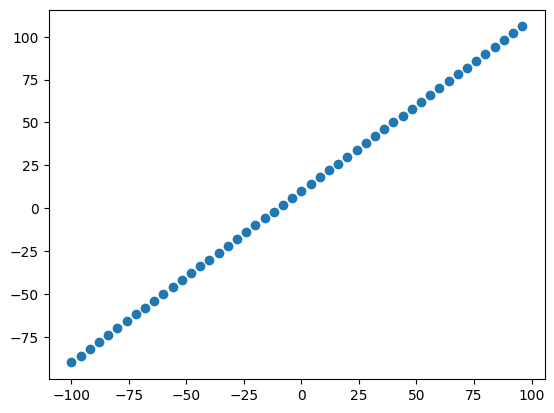

In [29]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y);

### The 3 sets

1. **Training set** - the model learns from this data, 70-80% of all data
2. **Validation set** - model get tuned to this data, 10-15% (tweaking the model and test how it reponses)
3. **Test set** - module gets evaluated on this data to test what it has learned, 10-15%

In [30]:
# Check the length of how many samples we have
len(X)

50

In [31]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing data
Now that we've got our data in training and test sets, let's visualize it

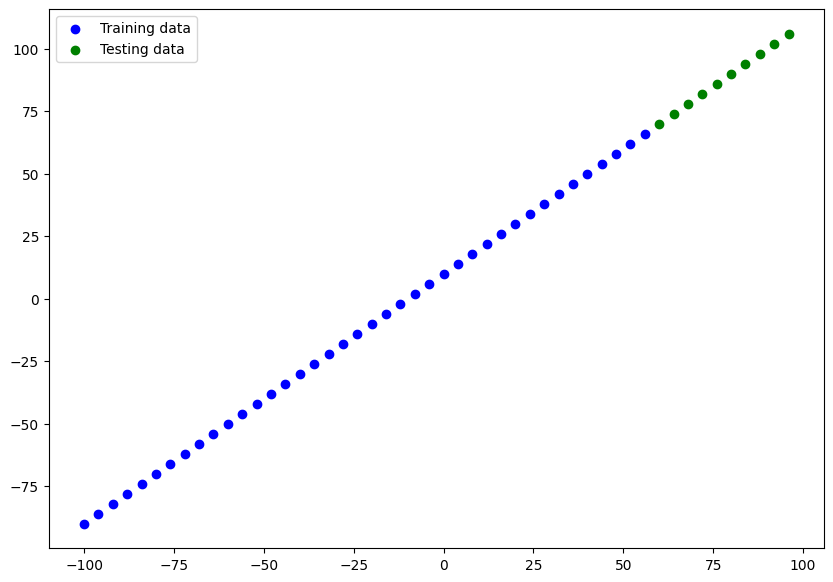

In [32]:
plt.figure(figsize=(10, 7)) # sets width 10 inches and height 7 inches
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show the legend
plt.legend(); # helps visually distinguish between training and testing points

In [33]:
# How to build a neural network for out data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # 1 dense layers since we are using one X value to predict 1 y value
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 44.0454 - mae: 44.0454 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.4212 - mae: 12.4212
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 8.3995 - mae: 8.3995
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.1304 - mae: 9.1304
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.2140 - mae: 8.2140
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.8695 - mae: 8.8695
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.8150 - mae: 7.8150
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.7867 - mae: 10.7867
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.6187 - mae: 7.6187
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.9600 - mae: 11.9600
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.1320 - mae: 8.1320
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.7810 - mae: 8.7810
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

### Visualizing the model

In [34]:
model.summary() # NOTE, for this summary the input shape is not defined yet

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [35]:

# Let's creat a model which builds automatically by defining the input_shape argument

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # 1 dense layers since we are using one X value to predict 1 y value
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

- Total params - total number of parameters in the model
- Trainable params - the parameters or patterns the model can update as it trains
- Non-trainable params - these parameters are not updated during training (this is typical when bringing other models from **transfer learning**)

In [37]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [38]:
# Get a summry of the model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

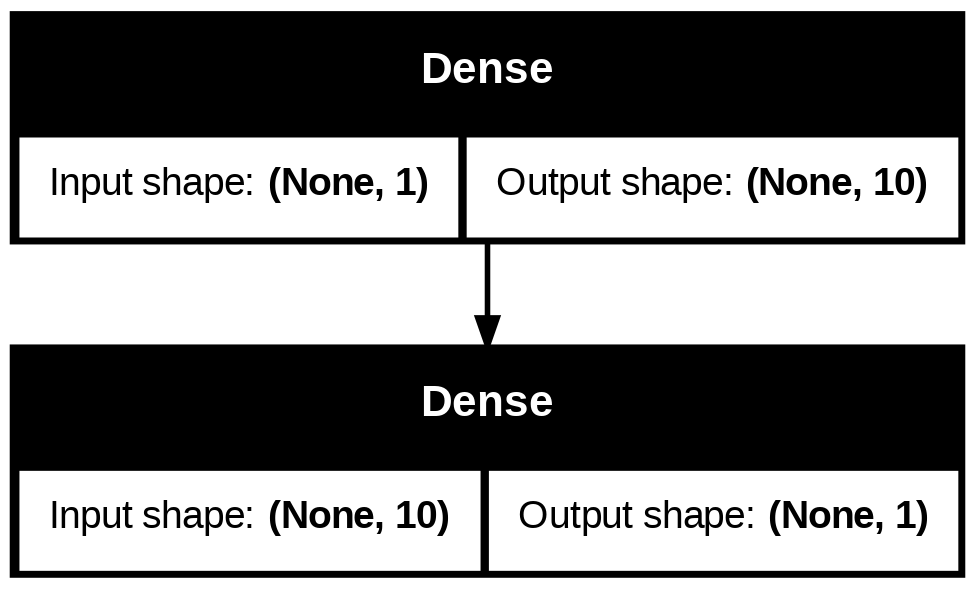

In [39]:
# Another way to visualize our data
from tensorflow.keras.utils import plot_model # it is not a standalone module like math, its  a function
plot_model(model=model, show_shapes=True)

### Visualizing our models predictions

- To visualize predictions, it's a good idea to plot them against groumd truth.

- Often you wil see this in the form of y_test or y_true (ground truth versus your model's prediction)

In [40]:
# Make some prediction
y_pred = model.predict(tf.expand_dims(X_test, axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[ 70.05749 ],
       [ 74.058136],
       [ 78.058784],
       [ 82.05943 ],
       [ 86.060074],
       [ 90.06073 ],
       [ 94.06138 ],
       [ 98.062035],
       [102.06266 ],
       [106.06332 ]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel lke you are going to reuse some kind of functionality in the future, it's good idea to turn it into a function

In [42]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, #your training inputs (usually X values)
                     train_labels=y_train, #the actual outputs (y values) for training
                     test_data=X_test, #your test inputs
                     test_labels=y_test, #the actual outputs for the test set
                     predictions=y_pred): #the predictions your model made using model.predict(...)
  """
  Plots training data, test data and compares prediction to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # plot testing data in green
  plt.scatter(test_data, test_labels, c="y", label="Testing data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


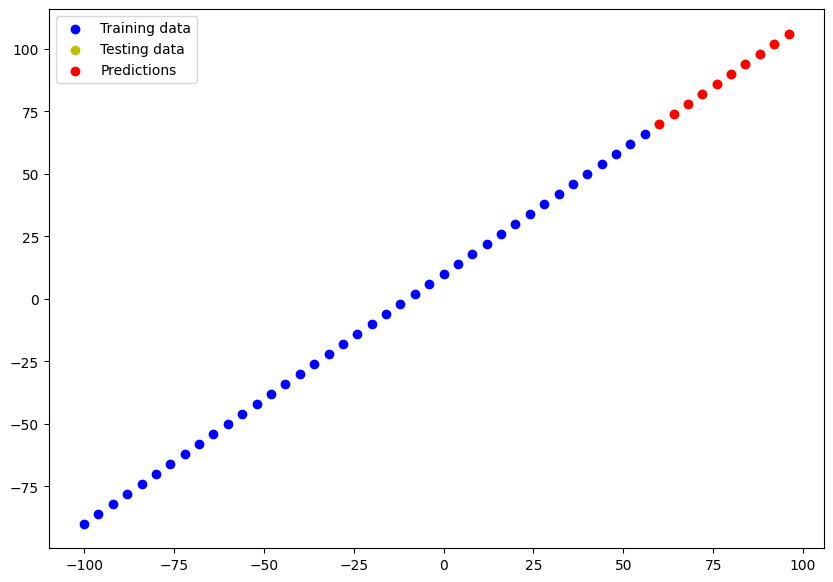

In [43]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluating metrics

- Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are woking on a regression, two of the main metrics:
1. MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
2. MSE - mean square errors, "square the average errors"

In [44]:
# Evaluate the model on the test
model.evaluate(tf.expand_dims(X_test, axis=-1), y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.0604 - mae: 0.0604


[0.06040344387292862, 0.06040344387292862]

In [45]:
# Calcualate the models mean absolute error
mae = tf.keras.losses.mae(y_true=y_test,
                          y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.05748749, 0.05813599, 0.05878448, 0.05943298, 0.06007385,
       0.06072998, 0.06137848, 0.06203461, 0.06266022, 0.06331635],
      dtype=float32)>

In [46]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.05749 ],
       [ 74.058136],
       [ 78.058784],
       [ 82.05943 ],
       [ 86.060074],
       [ 90.06073 ],
       [ 94.06138 ],
       [ 98.062035],
       [102.06266 ],
       [106.06332 ]], dtype=float32)>

In [47]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [48]:
tf.squeeze(y_pred) #removes dimensions of size (1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.05749 ,  74.058136,  78.058784,  82.05943 ,  86.060074,
        90.06073 ,  94.06138 ,  98.062035, 102.06266 , 106.06332 ],
      dtype=float32)>

In [49]:
# Calculate the mean absolute error
mae = tf.keras.losses.mae(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=0.06040344387292862>

In [50]:
# Calculate the mean square error
mse = tf.keras.losses.mse(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.00365203688852489>

In [51]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.mae(y_true=y_true,
                             y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.mse(y_true=y_true,
                             y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

1. Get more data - get more examples for our model (more opportunities to learn pattersn or relationships fatures and labels)
2. Make th emodel larger(using a complex model) it might come inform of laters or more hidden layers
3. Train for longer - give the model a chance to find patterns in the module


Let's do 3 modelling experiments:

1. model - 1 - same as the original model, 1 layer, trained for 100 epochs
2. model_2 - 2 layers, trained for 100 epochs
3. model_3 - 2 layers, trained for 500 epochs

Build Model 1

In [52]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 14.1385 - mae: 14.1385 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.7431 - mae: 8.7431
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.6098 - mae: 8.6098
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8.3823 - mae: 8.3823
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.1162 - mae: 9.1162
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.1969 - mae: 8.1969
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.8554 - mae: 8.8554
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 7.7950 - mae: 7.7950
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.7770 - mae: 10.7770
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.5973 - mae: 7.5973
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.9519 - mae: 11.9519
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.1149 - mae: 8.1149
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


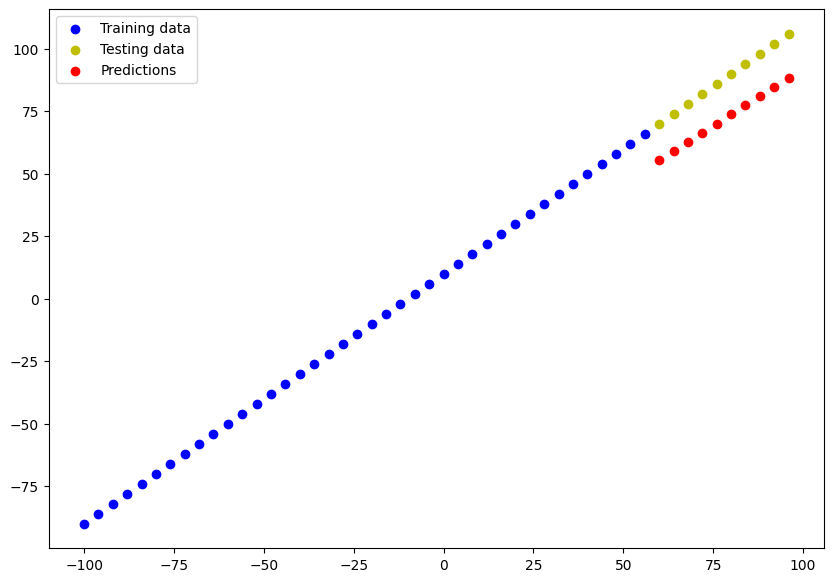

In [53]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_pred_1)

In [54]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=16.083812713623047>,
 <tf.Tensor: shape=(), dtype=float32, numpy=259.9095153808594>)

**Build model 2**
- 2 dense layers, trained for 100 epochs

In [55]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 4. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 23.0950 - mse: 779.1144 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.7017 - mse: 140.3898
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.5197 - mse: 185.3123
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.1902 - mse: 276.3206
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.3134 - mse: 230.8490
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.0319 - mse: 370.3620
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.3893 - mse: 120.7243
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.3780 - mse: 122.2463
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.4069 - mse: 144.2544 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.4858 - mse: 189.2023
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.2062 - mse: 279.6223
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.3742 - mse: 143.7026
Epoch 13/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


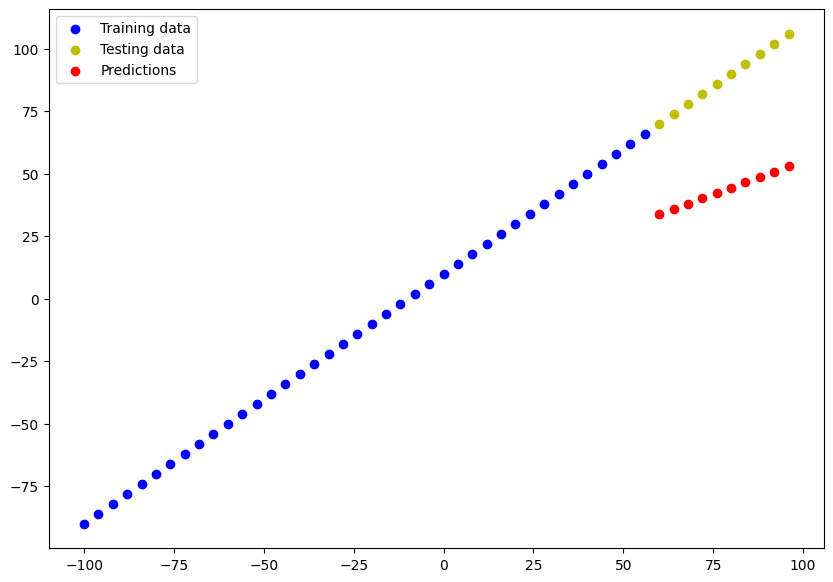

In [56]:
# Make and plot predictions on model_2
y_pred_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_pred_2)

In [57]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=44.600013732910156>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2018.049560546875>)

**Build model_3**
- 2 layers, trained for 500 epochs

In [59]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)



Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 45.3038 - mae: 45.3038 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 34.5533 - mae: 34.5533
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 24.7215 - mae: 24.7215
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 19.9951 - mae: 19.9951
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 18.0203 - mae: 18.0203
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 17.2006 - mae: 17.2006
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.8743 - mae: 11.8743
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 14.7426 - mae: 14.7426
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 15.5620 - mae: 15.5620
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.6490 - mae: 11.6490
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 14.6151 - mae: 14.6151
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.6630 - mae: 15.6630
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


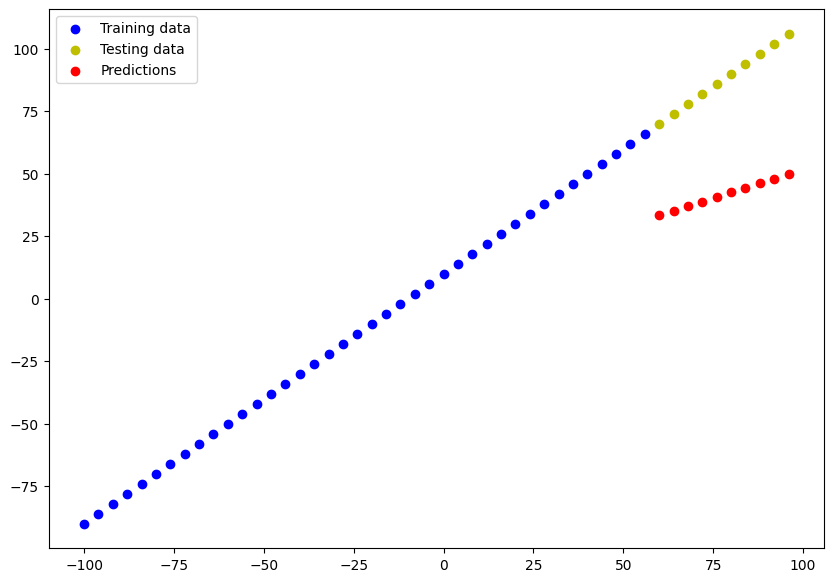

In [62]:
# Make and plot some predictions
y_preds_3 = model_3.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_3)

In [63]:
# Calculate modle_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=46.36614990234375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2188.66064453125>)

 # Comparing the results of our experiments

 Now let's compare the results of our experiments.

**NOTE**: When training a model, prioritize starting with smaller models before advancing to complex ones

In [64]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,16.083813,259.909515
1,model_2,44.600014,2018.049561
2,model_3,46.366150,2188.660645


It appears model_1 performed best

In [65]:
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**NOTE** One of the primary goals should be to minimize the time between the experiments by starting small.
- The more experiments you do, he more you will figure out what does not work and in turn get closer to figuring out what works.
- Recall, machine learnig motto is experiment, experiment, experiment

## Tracking your experiments

- One good habit in machine learning is tracking your experiments.
- When doing so it can be tedious when running alot of experiments.
- Luckily there are tools to help us out.

**Resources** As you build more models, you'll want to look into usung:
- **TensorBoard** - A component of the TF library to help modelling experiments.
- **Weights & Biases** - A tol for tracking all of kinds of machine learning experiments (pligs directly into TensorBoard)



## Saving our models

- Saving our models allows us to use the them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app.

- There are two main formats we can save our models

1. The SavedModel format
2. The HDF5 format

In [66]:
# Save model using the  SavedModel format
model_1.save("my_first_model.keras")

In [67]:
# Save model using the HDF5 Format
model_1.save("my_first_model.h5")

## Loading in a saved model

In [68]:
# Load in the SavedModel format model
loaded_model_1 = tf.keras.models.load_model("my_first_model.keras")
loaded_model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [69]:
loaded_model_1 = tf.keras.models.load_model("my_first_model.h5")
loaded_model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [70]:
# Compare model_1 predictions with SavedModel format model predictions
model_1_preds = model_1.predict(tf.expand_dims(X_test, axis=-1))
loaded_SavedModel_format_preds = loaded_model_1.predict(tf.expand_dims(X_test, axis=-1))
model_1_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [71]:
model_1_preds, loaded_SavedModel_format_preds

(array([[55.64697 ],
        [59.26235 ],
        [62.877728],
        [66.49311 ],
        [70.1085  ],
        [73.72388 ],
        [77.33926 ],
        [80.95464 ],
        [84.57002 ],
        [88.1854  ]], dtype=float32),
 array([[55.64697 ],
        [59.26235 ],
        [62.877728],
        [66.49311 ],
        [70.1085  ],
        [73.72388 ],
        [77.33926 ],
        [80.95464 ],
        [84.57002 ],
        [88.1854  ]], dtype=float32))

In [72]:
# Compare the MAE of model_1_preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_1_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [73]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("my_first_model.h5")
loaded_h5_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [74]:
# Check to see if loaded .h5 model predictions match model_1
model_1_preds = model_1.predict(tf.expand_dims(X_test, axis=-1))
loaded_h5_model_preds = loaded_h5_model.predict(tf.expand_dims(X_test, axis=-1))
model_1_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from google Colab

1. Go to the "files" tab and right click on the file you are after and click download.
2. Use code (See code cell below)
3. You can save it to googlee drive by connecting google drive and saving it there


In [75]:
# Download file form Google colab
from google.colab import files
files.download("my_first_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
# Saving a file from  Google colab to Google drive this requitres mounting Google drive
!cp /content/my_first_model.h5 /content/drive/MyDrive/NNR

In [77]:
# Checking whether its is copied
!ls /content/drive/MyDrive/NNR

my_first_model.h5


## A large Example

In [78]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [80]:
insurance["sex"], insurance["bmi"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       27.900
 1       33.770
 2       33.000
 3       22.705
 4       28.880
          ...  
 1333    30.970
 1334    31.920
 1335    36.850
 1336    25.800
 1337    29.070
 Name: bmi, Length: 1338, dtype: float64)

In [81]:
# Let's try one-hot encode our DataFrame so it is all numbers
insurance_one_hot = pd.get_dummies(insurance).astype(np.float64)
insurance_one_hot.head() # .head ensure it displays only the 1st 5 rows

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [82]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [83]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [84]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [85]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [86]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46.0,19.950,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,47.0,24.320,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,52.0,24.860,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,39.0,34.320,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,54.0,21.470,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18.0,31.350,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1130,39.0,23.870,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1294,58.0,25.175,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
860,37.0,47.600,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [87]:
# Build a neural network (sort like model_1 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9972.5156 - mae: 9972.5156  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7573.6362 - mae: 7573.6362
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7558.7041 - mae: 7558.7041
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7725.9829 - mae: 7725.9829
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7739.1465 - mae: 7739.1465
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7531.4141 - mae: 7531.4141
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7269.4424 - mae: 7269.4424
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7289.7866 - mae: 7289.7866
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7361.1470 - mae: 7361.1470
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7394.8247 - mae: 7394.8247
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7695.0259 - mae: 7695.0259
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [88]:
# Check the results of the insuarance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8037.9365 - mae: 8037.9365  


[8006.45263671875, 8006.45263671875]

In [89]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

# This is a bad performance, let's improve our model_2

1. Add an extra layer with more hidden units
2. Changed the optimizer

In [90]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [91]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4905.2046 - mae: 4905.2046  


[4765.2099609375, 4765.2099609375]

In [92]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8037.9365 - mae: 8037.9365 


[8006.45263671875, 8006.45263671875]

##Improvement for model_3

1. Same as model_2
2. Train for longer (200 epochs)

In [93]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [94]:
# Now let's evalute model_3
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3463.3733 - mae: 3463.3733  


[3397.035888671875, 3397.035888671875]

Text(0.5, 0, 'epochs')

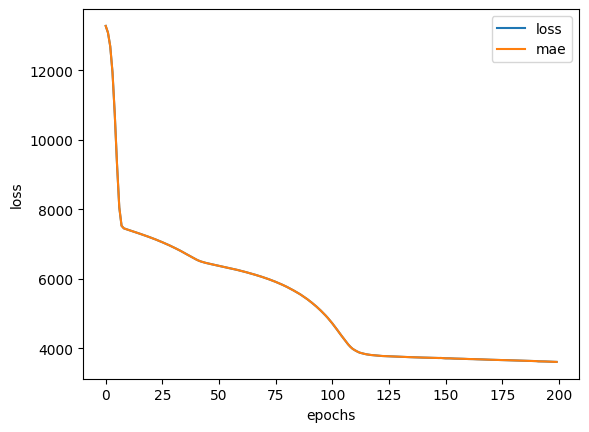

In [95]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

##How long should you train for?

- It depends on the problem.
- Tf has a solution it's called teh early stopping callback
- It is a tensorflow component you can add to your model to stop training once it stops improving a certain metrics

##Another way of prepocessing data (normalization and standardizatiion)

1. **Normalization** - converts all values to between 0 and 1 whilst preserving the original data

- Scikit-learn function - MinMaxScalar
- Used as a default scaler with neural networks

2. **Standardization** - removes the mean and divides each value by the standard deviation
- Scikit-learn function - StandardScaler
-Used when transforming a feature to ave close to normal distribution (**NOTE** this reduces the effect of the outliers)

In [96]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.850,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<Axes: ylabel='Frequency'>

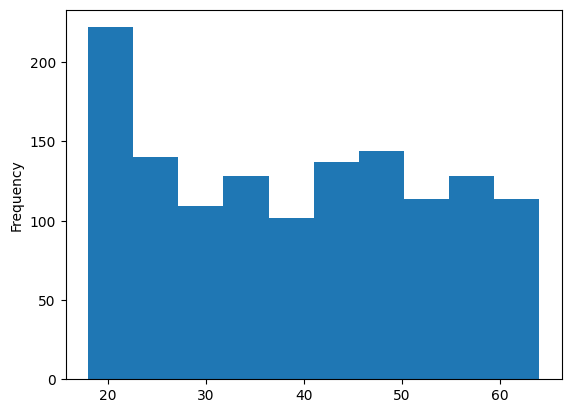

In [98]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

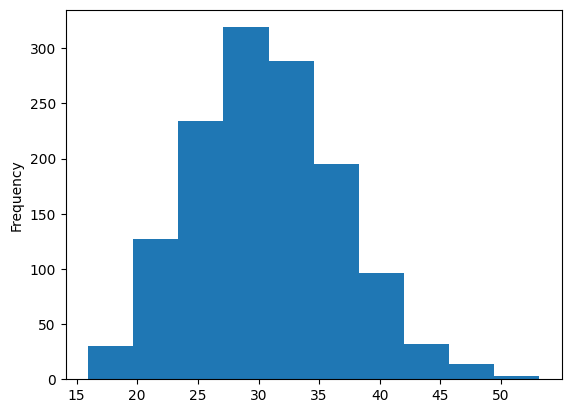

In [100]:
X["bmi"].plot(kind="hist")

In [101]:
X["children"].value_counts()

,count
children,
0.0,574
1.0,324
2.0,240
3.0,157
4.0,25
5.0,18


## Preprocessing data (normalization and standardization)
- In terms of scaling values, neural networks tend to prefer normalization
- If not sure the one to use, just try both and see which one performs better

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insuarance dataframe
insuarance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-learn

In [105]:
from sklearn.compose import make_column_transformer # It creates a column transformer object, which can apply things like scaling to numeric columns and encoding to categorical ones — all in one pipeline.
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # ignore-means if any new category appearsduring prediction not seen during training it gets ignored
)

# Create X and y
X = insuarance.drop("charges", axis=1) # axis =1 means drop a column not a row(axis=0)
y = insuarance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training daya and test data with normalization (MinMaxScaler)and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [106]:
# What does our data look like?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [110]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [109]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

So wonderful! we have now normalized and one hot encoded our data. Now let's build a neural network

In [113]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insuarance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insuarance_model_4.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"])

# 3. Fit the model
insuarance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13297.9209 - mae: 13297.9209
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13290.9326 - mae: 13290.9326
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13273.4014 - mae: 13273.4014
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13235.1680 - mae: 13235.1680
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13164.5400 - mae: 13164.5400
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13049.7354 - mae: 13049.7354
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12880.1553 - mae: 12880.1553
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12645.8428 - mae: 12645.8428
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12337.1016 - mae: 12337.1016
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11946.7266 - mae: 11946.7266
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11481.4893 - mae: 11481.4893
Epoch 12/100
34/34 ━━━━━━━━━━━

In [114]:
# Evaluate our model trained on normalized data
insuarance_model_4.evaluate(X_test_normal, y_test)# when we normalize our data our models tend to train faster with les epochs

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3517.1536 - mae: 3517.1536  


[3431.549560546875, 3431.549560546875]